# Demo

This demo demonstrate how to train various (semi-supervised) Neural NMF models and how to analyze and visualize the result.

In [1]:
# loading packages and functions
import torch
import numpy as np
import scipy.io
import torch.nn as nn
from torch.autograd import Variable
from matplotlib import pyplot as plt
%matplotlib inline
#import Ipynb_importer

import sys
sys.path.insert(1, '../src')
from neural_nmf import Neural_NMF, Energy_Loss_Func, L21_Norm
from lsqnonneg_module import LsqNonneg
from train import train_unsupervised, train_supervised
from writer import Writer

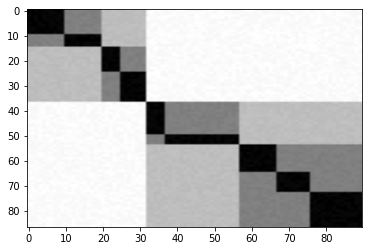

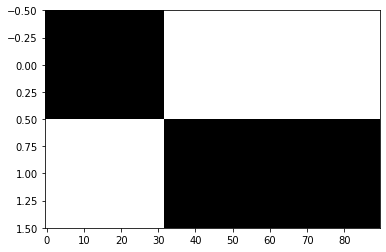

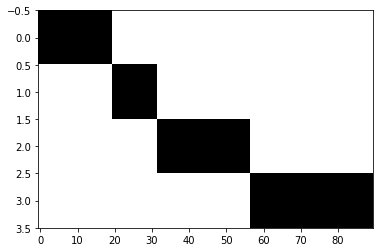

In [2]:
# data loading 
data = scipy.io.loadmat('synthetic_noise.mat')
X = data['X']
X = Variable(torch.from_numpy(X).double())
Y2 = data['Y2']
Y2 = Variable(torch.from_numpy(Y2).double())
Y4 = data['Y4']
Y4 = Variable(torch.from_numpy(Y4).double())
Y9 = data['Y9']
Y9 = Variable(torch.from_numpy(Y9).double())
L0 = data['L0']
L0 = Variable(torch.from_numpy(L0).double())
L10 = data['L10']
L10 = Variable(torch.from_numpy(L10).double())
L20 = data['L20']
L20 = Variable(torch.from_numpy(L20).double())
L30 = data['L30']
L30 = Variable(torch.from_numpy(L30).double())
L40 = data['L40']
L40 = Variable(torch.from_numpy(L40).double())
L50 = data['L50']
L50 = Variable(torch.from_numpy(L50).double())
L60 = data['L60']
L60 = Variable(torch.from_numpy(L60).double())
L70 = data['L70']
L70 = Variable(torch.from_numpy(L70).double())
L80 = data['L80']
L80 = Variable(torch.from_numpy(L80).double())
L90 = data['L90']
L90 = Variable(torch.from_numpy(L90).double())
labels9 = data['labels9']
labels9 = Variable(torch.from_numpy(labels9).long())
labels9 = torch.reshape(labels9,[90])
labels4 = data['labels4']
labels4 = Variable(torch.from_numpy(labels4).long())
labels4 = torch.reshape(labels4,[90])
labels2 = data['labels2']
labels2 = Variable(torch.from_numpy(labels2).long())
labels2 = torch.reshape(labels2,[90])
plt.imshow(X,aspect='auto',cmap='binary')
plt.show()
plt.imshow(Y2,aspect='auto',cmap='binary')
plt.show()
plt.imshow(Y4,aspect='auto',cmap='binary')
plt.show()

In [3]:
# set the network parameters
m = X.shape[0]
k1 = 9
k2 = 4
k3 = 2

## Unsupervised One-Layer

In [ ]:
net = Neural_NMF([m, k1])
loss_func = Energy_Loss_Func()
X_input = X
history_unsupervised = train_unsupervised(net, X_input, loss_func, epoch = 10000, lr = 1,weight_decay = 0.99,decay_epoch=100,verbose_epoch=1000,full_history = True)

epoch =  1000 
 tensor(0.0444, dtype=torch.float64)
epoch =  2000 
 tensor(0.0285, dtype=torch.float64)


In [ ]:
# by calling history_unsupervised.get('variable_name'), you can get the variables that you recorded in the writer
# getting these results might be helpful for debugging and choosing hyperparameters
A1 = history_unsupervised.get('A1')
S1 = history_unsupervised.get('S1')
grad_A1_lst = history_unsupervised.get('grad_A1')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()

In [ ]:
# plot the loss curve
history_unsupervised.plot_scalar('loss')

## Unsupervised Two-Layer

In [ ]:
net = Neural_NMF([m, k1,k2])
X_input = X
history_unsupervised = train_unsupervised(net, X_input, epoch = 10000, lr = 1,weight_decay = 0.99,decay_epoch=100,verbose_epoch=1000,full_history = True)

In [ ]:
# by calling history_unsupervised.get('variable_name'), you can get the variables that you recorded in the writer
# getting these results might be helpful for debugging and choosing hyperparameters
A1 = history_unsupervised.get('A1')
S1 = history_unsupervised.get('S1')
grad_A1_lst = history_unsupervised.get('grad_A1')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
A2 = history_unsupervised.get('A2')
S2 = history_unsupervised.get('S2')
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')

In [ ]:
# plot the loss curve
history_unsupervised.plot_scalar('loss')

## Unsupervised Three-Layer

In [ ]:
net = Neural_NMF([m, k1, k2, k3])
loss_func = Energy_Loss_Func()
X_input = X
history_unsupervised = train_unsupervised(net, X_input, loss_func, epoch = 10000, lr = 1,weight_decay = 0.99,decay_epoch=100,verbose_epoch=1000,full_history = True)

In [ ]:
# by calling history_unsupervised.get('variable_name'), you can get the variables that you recorded in the writer
# getting these results might be helpful for debugging and choosing hyperparameters
A1 = history_unsupervised.get('A1')
S1 = history_unsupervised.get('S1')
grad_A1_lst = history_unsupervised.get('grad_A1')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
A2 = history_unsupervised.get('A2')
S2 = history_unsupervised.get('S2')
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
A3 = history_unsupervised.get('A3')
S3 = history_unsupervised.get('S3')
plt.imshow(A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()

In [ ]:
# plot the loss curve
history_unsupervised.plot_scalar('loss')

## Supervised One-Layer

In [ ]:
# supervised case
c = 9
net = Neural_NMF([m, k1], 9)
net.linear.weight.data = torch.rand(c,k1,dtype = torch.double)
loss_func = Energy_Loss_Func(lambd = 1,classification_type = 'L2')
history_supervised = train_supervised(net, X, Y9, loss_func = loss_func, epoch = 10000, decay_epoch=100,lr_nmf = 1, lr_classification = 1, weight_decay = 1,verbose_epoch=1000,full_history = True)

In [ ]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()

In [ ]:
# plot the loss curve
history_supervised.plot_scalar('loss')

## Supervised Two-Layer

In [ ]:
c = 4
net = Neural_NMF([m, k1, k2], 4)
#net.linear.weight.data = torch.rand(c,k2,dtype = torch.double)
loss_func = Energy_Loss_Func(lambd = 1,classification_type = 'L2')
history_supervised = train_supervised(net, X, Y4, loss_func = loss_func, epoch = 10000, lr_nmf = 1, lr_classification = 1, weight_decay = 1,decay_epoch=100,verbose_epoch=1000,full_history = True)

In [ ]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()

In [ ]:
# plot the loss curve
history_supervised.plot_scalar('loss')

## Supervised Three-Layer

In [ ]:
c = 2
net = Neural_NMF([m, k1, k2, k3], c)
loss_func = Energy_Loss_Func(lambd = 1,classification_type = 'L2')
history_supervised = train_supervised(net, X, Y2, loss_func = loss_func, epoch = 10000, lr_nmf = 1, lr_classification = 1, weight_decay = 1,decay_epoch=100,verbose_epoch=1000,full_history = True)

In [ ]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
A3 = history_supervised.get('A3')
S3 = history_supervised.get('S3')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()

In [ ]:
# plot the loss curve
history_supervised.plot_scalar('loss')

## Supervised One-Layer (Cross-Entropy)

In [ ]:
# supervised case
c = 9
net = Neural_NMF([m, k1], 9)
loss_func = Energy_Loss_Func(lambd = 1)
history_supervised = train_supervised(net, X, labels9, loss_func = loss_func, epoch = 10000, decay_epoch=100,lr_nmf = 1, lr_classification = 1, weight_decay = 1,verbose_epoch=1000,full_history = True)

In [ ]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()

In [ ]:
# plot the loss curve
history_supervised.plot_scalar('loss')

## Supervised Two-Layer (Cross-Entropy)

In [ ]:
c = 4
net = Neural_NMF([m, k1, k2], 4)
loss_func = Energy_Loss_Func(lambd = 1)
history_supervised = train_supervised(net, X, labels4, loss_func = loss_func, epoch = 10000, lr_nmf = 1, lr_classification = 1, weight_decay = 1,decay_epoch=100,verbose_epoch=1000,full_history = True)

In [ ]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()

In [ ]:
# plot the loss curve
history_supervised.plot_scalar('loss')

## Supervised Three-Layer (Cross-Entropy)

In [ ]:
c = 2
net = Neural_NMF([m, k1, k2, k3], c)
loss_func = Energy_Loss_Func(lambd = 1)
history_supervised = train_supervised(net, X, labels2, loss_func = loss_func, epoch = 10000, lr_nmf = 1, lr_classification = 1, weight_decay = 1,decay_epoch=100,verbose_epoch=1000,full_history = True)

In [ ]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
A3 = history_supervised.get('A3')
S3 = history_supervised.get('S3')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()

In [ ]:
# plot the loss curve
history_supervised.plot_scalar('loss')

## Semi-supervised Three-Layer

In [ ]:
c = 2
net = Neural_NMF([m, k1, k2, k3], c)
loss_func = Recon_Loss_Func(lambd = 1,classification_type = 'L2')
history_supervised = train_supervised(net, X, Y2, L=L40, loss_func = loss_func, epoch = 10000, lr_nmf = 1, lr_classification = 1, weight_decay = 1,decay_epoch=100,verbose_epoch=1000,full_history = True)

In [ ]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
A3 = history_supervised.get('A3')
S3 = history_supervised.get('S3')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(L40*Y2,aspect='auto',cmap='binary')
plt.show()

In [ ]:
# plot the loss curve
history_supervised.plot_scalar('loss')

## Semi-supervised Three-Layer (Cross-Entropy)

In [ ]:
c = 2
net = Neural_NMF([m, k1, k2, k3], c)
loss_func = Recon_Loss_Func(lambd = 1)
history_supervised = train_supervised(net, X, labels2, L=L70, loss_func = loss_func, epoch = 10000, lr_nmf = 1, lr_classification = 1, weight_decay = 1,decay_epoch=100,verbose_epoch=1000,full_history = True)

In [ ]:
A1 = history_supervised.get('A1')
S1 = history_supervised.get('S1')
A2 = history_supervised.get('A2')
S2 = history_supervised.get('S2')
A3 = history_supervised.get('A3')
S3 = history_supervised.get('S3')
B = history_supervised.get('weight')
plt.imshow(A1[-1] @ S1[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ S2[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(A1[-1] @ A2[-1] @ A3[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(B[-1] @ S3[-1],aspect='auto',cmap='binary')
plt.show()
plt.imshow(L70*Y2,aspect='auto',cmap='binary')
plt.show()

In [ ]:
# plot the loss curve
history_supervised.plot_scalar('loss')